# Samurai by the numbers (lvl 1-49)
## by Tzuyu Chou (Cactuar)

### Update log

-06/04/2017: Introduced modeling GCD time and GCD reduction through the Shifu haste buff. Changed analysis to emphasize potency per second over potency per GCD. Removed the Shifu potency buff from calculations.

-06/03/2017: Created a parser to convert strings describing action sequences into a rotation dataframe. Pruned some uninteresting analysis. Created new plots for analyzing scaling of AoE rotations with encounter length and group size. Included average potency per GCD calculations. Dataframe structure will allow monitoring of buffs, DoTs, and other statuses over time. Changed text size and added line breaks through Markdown.

-06/02/2017: Finished up to level 49 for now.

-06/01/2017: Up to level 40 rotation.

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

## lvl 1-3

Up to level 3, you only have one weaponskill... so use it.

In [2]:
sam = Samurai()

actions = [('Hakaze'), ('Hakaze'), ('Hakaze'), ('Hakaze'), 
           ('Hakaze'), ('Hakaze'), ('Hakaze'), ('Hakaze')]

In [3]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 150.0
average potency per second = 62.5


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.4,Hakaze,,150.0,False,False,False,0,0,300.0
2,4.8,Hakaze,,150.0,False,False,False,0,0,450.0
3,7.2,Hakaze,,150.0,False,False,False,0,0,600.0
4,9.6,Hakaze,,150.0,False,False,False,0,0,750.0
5,12.0,Hakaze,,150.0,False,False,False,0,0,900.0
6,14.4,Hakaze,,150.0,False,False,False,0,0,1050.0
7,16.8,Hakaze,,150.0,False,False,False,0,0,1200.0


## lvl 4-17

At level 4, you gain the use of Jinpu, which combos from Hakaze and gives you your damage up buff. You'll definitely want to keep this buff up at all times and it should be simple enough with its 30s duration. The next weaponskill you obtain is Enbi, a ranged attack with a niche use. Level 6 grants you the defensive buff, Third Eye, and level 10 grants you the ability Ageha, an execution ability. Use it whenever available.

In [4]:
sam = Samurai()

actions = [('Hakaze'), ('Jinpu'), ('Hakaze'), ('Jinpu'),
           ('Hakaze'), ('Jinpu'), ('Hakaze'), ('Jinpu')]

In [5]:
df1, average_potency, pps = sam.parse_rotation(actions)
display(df1)

average potency per GCD = 239.1875
average potency per second = 99.6614583333


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.4,Jinpu,,280.0,False,False,False,0,0,430.0
2,4.8,Hakaze,,172.5,True,False,False,0,0,602.5
3,7.2,Jinpu,,322.0,True,False,False,0,0,924.5
4,9.6,Hakaze,,172.5,True,False,False,0,0,1097.0
5,12.0,Jinpu,,322.0,True,False,False,0,0,1419.0
6,14.4,Hakaze,,172.5,True,False,False,0,0,1591.5
7,16.8,Jinpu,,322.0,True,False,False,0,0,1913.5


How does this compare to the previous rotation?

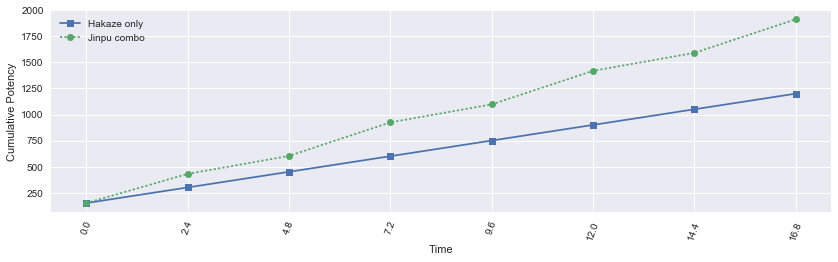

In [6]:
compare_potencies([df0, df1], ['Hakaze only', 'Jinpu combo'])

## lvl 18-29

Level 18 sees the introduction of your haste buff, Shifu. When executed as a combo, Shifu grants you this buff for a duration of 30s in addition to the additional combo potency. At these levels, it's fairly close as to which buff takes priority, Shifu or Jinpu. However, with the introduction of Sen, you will definitely want to prioritize Shifu so that you may open your Sen more often to execute the powerful Iaijutsu more often.

In [7]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu')]

In [8]:
df2, average_potency, pps = sam.parse_rotation(actions)
display(df2)

average potency per GCD = 231.125
average potency per second = 105.53652968


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Hakaze,,150.0,False,True,False,0,0,580.0
3,6.72,Jinpu,,280.0,False,True,False,0,0,860.0
4,8.88,Hakaze,,172.5,True,True,False,0,0,1032.5
5,11.04,Shifu,,322.0,True,True,False,0,0,1354.5
6,13.20,Hakaze,,172.5,True,True,False,0,0,1527.0
7,15.36,Jinpu,,322.0,True,True,False,0,0,1849.0


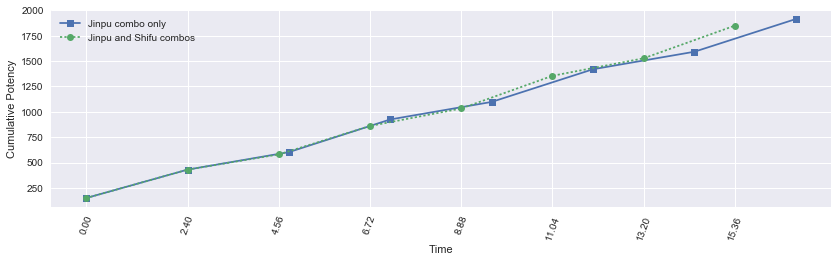

In [9]:
compare_potencies([df1, df2], ['Jinpu combo only', 'Jinpu and Shifu combos'])

** Note: The Shifu buff is only accounted for in potency per second calculations.

Level 26 introduces your first AoE ability, Fuga. At this time, it does not combo to or from anything and deals 100 potency to all targets in a frontal cone.

Napkin math says that Fuga should do more potency per GCD for three or more targets. Should we put our Shifu and Jinpu buffs if they're not up before using Fuga? Depends on how long the encounter is.

### For Fuga with buffs:

In [10]:
dfs_buff = []
pps_buff = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_buff.append(df_temp)
    pps_buff.append(pps)
    
    labels.append('%s targets' % n_targets)
    
    print('\n')

number of targets = 2
average potency per GCD = 226.25
average potency per second = 104.022988506


number of targets = 3
average potency per GCD = 312.5
average potency per second = 143.67816092


number of targets = 4
average potency per GCD = 398.75
average potency per second = 183.333333333


number of targets = 5
average potency per GCD = 485.0
average potency per second = 222.988505747


number of targets = 6
average potency per GCD = 571.25
average potency per second = 262.643678161


number of targets = 7
average potency per GCD = 657.5
average potency per second = 302.298850575




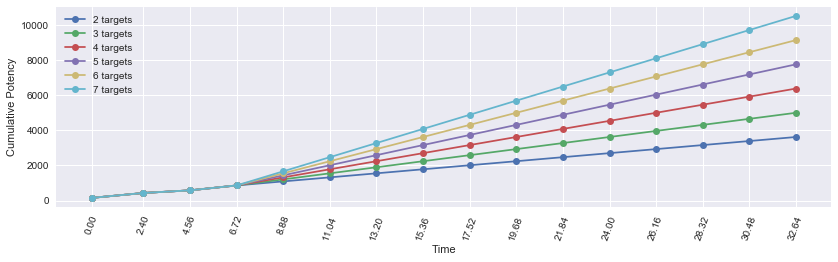

In [11]:
compare_n_potencies(dfs_buff, labels)

### For Fuga with no buffs:

In [12]:
dfs_no_buff = []
pps_no_buff = []
labels = []

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga'),
               ('Fuga'), ('Fuga'), ('Fuga'), ('Fuga')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_no_buff.append(df_temp)
    pps_no_buff.append(pps)
    
    labels.append('%s targets' % n_targets)
    
    print('\n')

number of targets = 2
average potency per GCD = 200.0
average potency per second = 83.3333333333


number of targets = 3
average potency per GCD = 300.0
average potency per second = 125.0


number of targets = 4
average potency per GCD = 400.0
average potency per second = 166.666666667


number of targets = 5
average potency per GCD = 500.0
average potency per second = 208.333333333


number of targets = 6
average potency per GCD = 600.0
average potency per second = 250.0


number of targets = 7
average potency per GCD = 700.0
average potency per second = 291.666666667




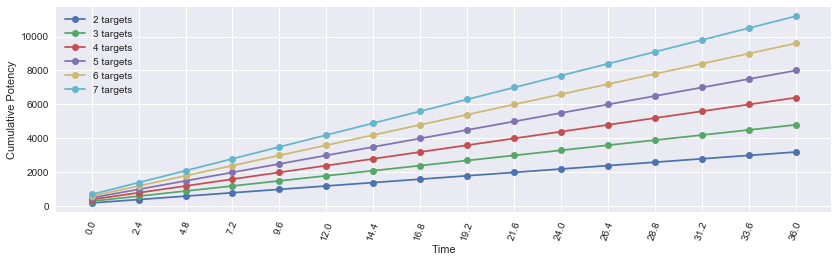

In [13]:
compare_n_potencies(dfs_no_buff, labels)

The potency over four GCDs to put up Shifu and Jinpu is about 977. If this is more than the potential potency delivered by four Fuga, we need the increased potency from the buffs to make up for this "buff tax."

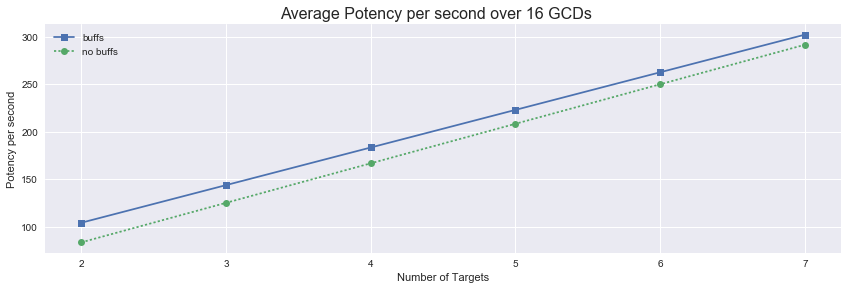

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, pps_buff, '-s', label='buffs')
axes.plot(n_target_range, pps_no_buff, ':o', label='no buffs')
axes.set_ylabel('Potency per second')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Average Potency per second over %s GCDs' % len(actions))

Over a 16 GCD encounter, buffing before Fuga spam wins every time. Let's see how the two rotations compare over different encounter lengths.

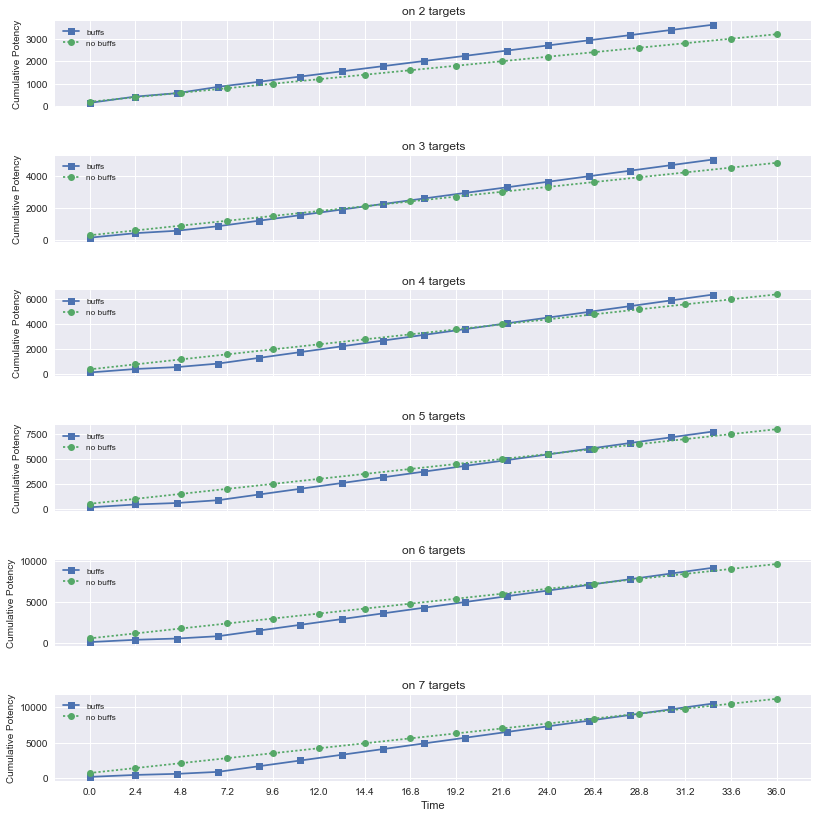

In [15]:
fig, axes = plt.subplots(nrows=len(dfs_buff), ncols=1, sharex=True, figsize=(12,12))
fig.tight_layout(pad=2)

for k, _ in enumerate(dfs_buff): 
    ax = axes[k]
    
    xlocs = dfs_buff[k]['Time']
    ax.plot(xlocs, dfs_buff[k]['Total Potency'], '-s', label='buffs')
    
    xlocs = dfs_no_buff[k]['Time']
    ax.plot(xlocs, dfs_no_buff[k]['Total Potency'], ':o', label='no buffs')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('Time')
    
    axes[-1].set_xticks(xlocs)
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
    
    ax.set_title('on %s targets' % n_target_range[k])

fig.tight_layout(pad=3)

There are approximately fourteen GCDs after putting up your first buff, Shifu before you need to refresh it. For small mob counts, the crossover point where putting up buffs before using Fuga is more optimal occurs fairly early on. However, as the number of targets increases, the upfront "cost" of putting the buffs up does not pay off until much later. A sixteen GCD pull is likely to run you dry on TP, even with Invigorate. At these low levels, the pull sizes are likely to be small, so putting up buffs first is probably optimal.

Note that the potency per second of the buffed AoE rotation is greater than that of the single target rotation for pulls of three or more targets.

### Priority: Shifu > Jinpu. 
### Filler: Either combo to maintain the buffs.

### AoE: Shifu > Jinpu > Fuga for small groups. Fuga only for very large groups (>7 or so)

## lvl 30-39

Level 30 sees the introduction of your first Sen through the Gekko combo finisher (combo from Jinpu) and with it your first Iaijutsu, Higanbana. This powerful single-target weaponskill applies a 60s DoT in addition to initial damage for a total of 940 potency over its duration.

In [16]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu')]

In [17]:
df3, average_potency, pps = sam.parse_rotation(actions)
display(df3)

average potency per GCD = 304.722571429
average potency per second = 139.964435696


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Hakaze,,150.000,False,True,False,0,0,580.000
3,6.72,Jinpu,,280.000,False,True,False,0,0,860.000
4,8.88,Gekko,,460.000,True,True,False,0,0,1320.000
5,11.04,Higanbana,,276.000,True,True,False,0,10,1596.000
6,13.20,Hakaze,,205.827,True,True,False,1,10,1801.827
7,15.36,Jinpu,,355.327,True,True,False,1,10,2157.154
8,17.52,Gekko,,493.327,True,True,False,1,10,2650.481
9,19.68,Hakaze,,205.827,True,True,False,1,20,2856.308


** Note: the potency of the DoT is prorated due to the GCD being shorter than the DoT tick period. So Higanbana's initial potency is applied on action and the DoT potency is added to subsequent GCDs. 

This combo finisher is a massive increase in potency per second (~40%).

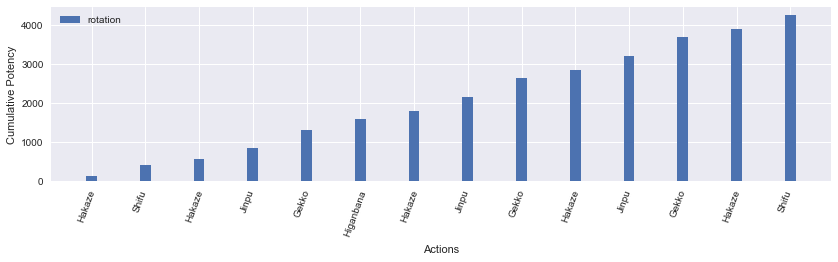

In [18]:
plot_potency(df3)

At this point, the average potency of the Gekko combo is $400+280+150=830/3=~276.66$ before buffs. The average potency of the Shifu combo is $150+280=430/2=215$ before buffs. Therefore, Higanbana is more optimal than the Gekko combo after two DoT ticks. Since it takes approximately 3-4 GCDs to reapply Higanbana (Gekko combo plus cast time of Higanbana), Higanbana may be optimal to clip in single target situations. Depending on the GCD and server tick, this may be close. Additionally, in small mob groups, applying Higanbana to each target may also be optimal.

In [19]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Shifu')]

In [20]:
df3_clip, average_potency, pps = sam.parse_rotation(actions)
display(df3_clip)

average potency per GCD = 305.298125
average potency per second = 140.366954023


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Hakaze,,150.000,False,True,False,0,0,580.000
3,6.72,Jinpu,,280.000,False,True,False,0,0,860.000
4,8.88,Gekko,,460.000,True,True,False,0,0,1320.000
5,11.04,Higanbana,,276.000,True,True,False,0,10,1596.000
6,13.20,Hakaze,,205.827,True,True,False,1,10,1801.827
7,15.36,Jinpu,,355.327,True,True,False,1,10,2157.154
8,17.52,Gekko,,493.327,True,True,False,1,10,2650.481
9,19.68,Higanbana,,309.327,True,True,False,1,20,2959.808


In a multi-target situation, the DoT can be applied to different mobs to avoid clipping. This will increase the DoT potency accumulation following each Higanbana application, leading to a slight increase in net potency. Note the reapplication of Shifu to keep the buff up.

Now let's try applying Higanbana once and not clipping it (e.g., single target situation):

In [21]:
sam = Samurai()

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Jinpu'), ('Gekko'), 
           ('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu')]

In [22]:
df3_noclip, average_potency, pps = sam.parse_rotation(actions)
display(df3_noclip)

average potency per GCD = 301.704375
average potency per second = 138.714655172


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Hakaze,,150.000,False,True,False,0,0,580.000
3,6.72,Jinpu,,280.000,False,True,False,0,0,860.000
4,8.88,Gekko,,460.000,True,True,False,0,0,1320.000
5,11.04,Higanbana,,276.000,True,True,False,0,10,1596.000
6,13.20,Hakaze,,205.827,True,True,False,1,10,1801.827
7,15.36,Jinpu,,355.327,True,True,False,1,10,2157.154
8,17.52,Gekko,,493.327,True,True,False,1,10,2650.481
9,19.68,Hakaze,,205.827,True,True,False,1,20,2856.308


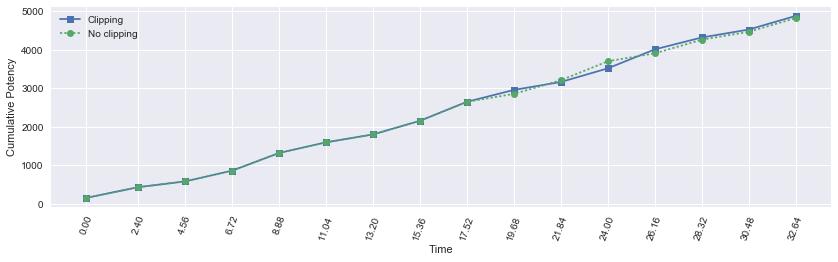

In [23]:
compare_potencies([df3_clip, df3_noclip], ['Clipping', 'No clipping'])

It's fairly close over this time horizon. The average potency per second is vastly dependent on where the encounter ends more than anything. Regardless if you clip Higanbana or not, it is better than not using Higanbana at all. The bottom line: use your Iaijutsu!

Level 35 introduces an AoE combo with Mangetsu (combo from Fuga). This weaponskill also opens the Getsu Sen. Due to the diminishing AoE scaling, this combo is an average of no less than 100 potency per target over two GCDs. Because Mangetsu opens the Getsu Sen, this allows you to apply Higanbana to individual targets in the group. Depending on group size and encounter duration, this may be optimal. 

In [24]:
dfs_higanbana = []
pps_higanbana = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Mangetsu'), ('Higanbana'), ('Fuga'),
               ('Mangetsu'), ('Higanbana'), ('Fuga'), ('Mangetsu'),
               ('Higanbana'), ('Fuga'), ('Mangetsu'), ('Higanbana'),
               ('Fuga'), ('Mangetsu')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_higanbana.append(df_temp)
    pps_higanbana.append(pps)
    
    labels.append('%s targets' % n_targets)  
    print('\n')

number of targets = 2
average potency per GCD = 303.714285714
average potency per second = 126.547619048


number of targets = 3
average potency per GCD = 408.571428571
average potency per second = 170.238095238


number of targets = 4
average potency per GCD = 506.285714286
average potency per second = 210.952380952


number of targets = 5
average potency per GCD = 584.857142857
average potency per second = 243.69047619


number of targets = 6
average potency per GCD = 656.285714286
average potency per second = 273.452380952


number of targets = 7
average potency per GCD = 727.714285714
average potency per second = 303.214285714




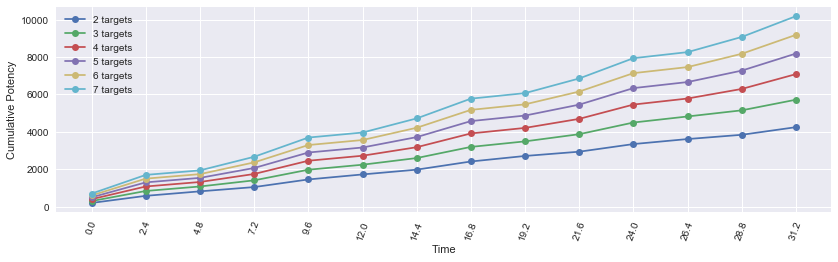

In [25]:
compare_n_potencies(dfs_higanbana, labels)

In [26]:
dfs_no_higanbana = []
pps_no_higanbana = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
               ('Fuga'), ('Mangetsu')]

    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_no_higanbana.append(df_temp)
    pps_no_higanbana.append(pps)
    
    labels.append('%s targets' % n_targets)  
    print('\n')

number of targets = 2
average potency per GCD = 290.0
average potency per second = 120.833333333


number of targets = 3
average potency per GCD = 420.0
average potency per second = 175.0


number of targets = 4
average potency per GCD = 540.0
average potency per second = 225.0


number of targets = 5
average potency per GCD = 650.0
average potency per second = 270.833333333


number of targets = 6
average potency per GCD = 750.0
average potency per second = 312.5


number of targets = 7
average potency per GCD = 850.0
average potency per second = 354.166666667




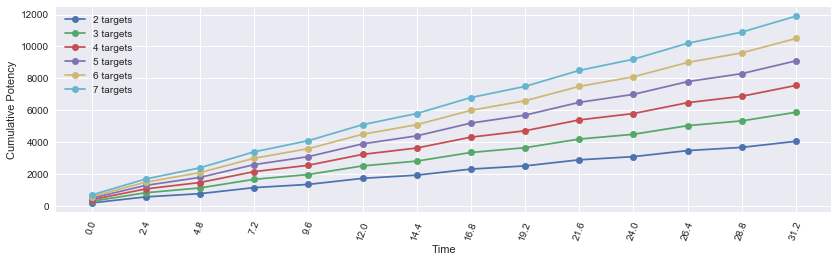

In [27]:
compare_n_potencies(dfs_no_higanbana, labels)

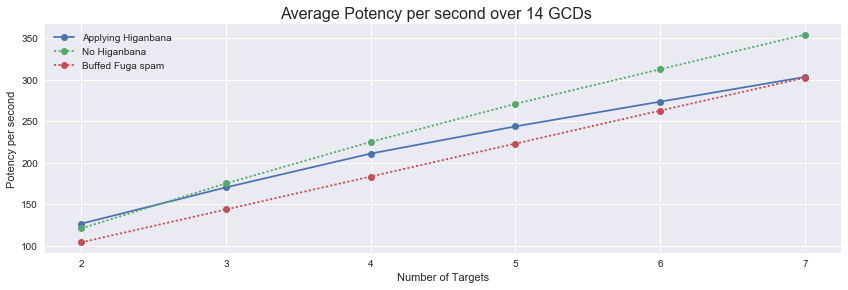

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, pps_higanbana, '-o', label='Applying Higanbana')
axes.plot(n_target_range, pps_no_higanbana, ':o', label='No Higanbana')
axes.plot(n_target_range, pps_buff, ':o', label='Buffed Fuga spam')
axes.set_ylabel('Potency per second')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Average Potency per second over %s GCDs' % len(actions))

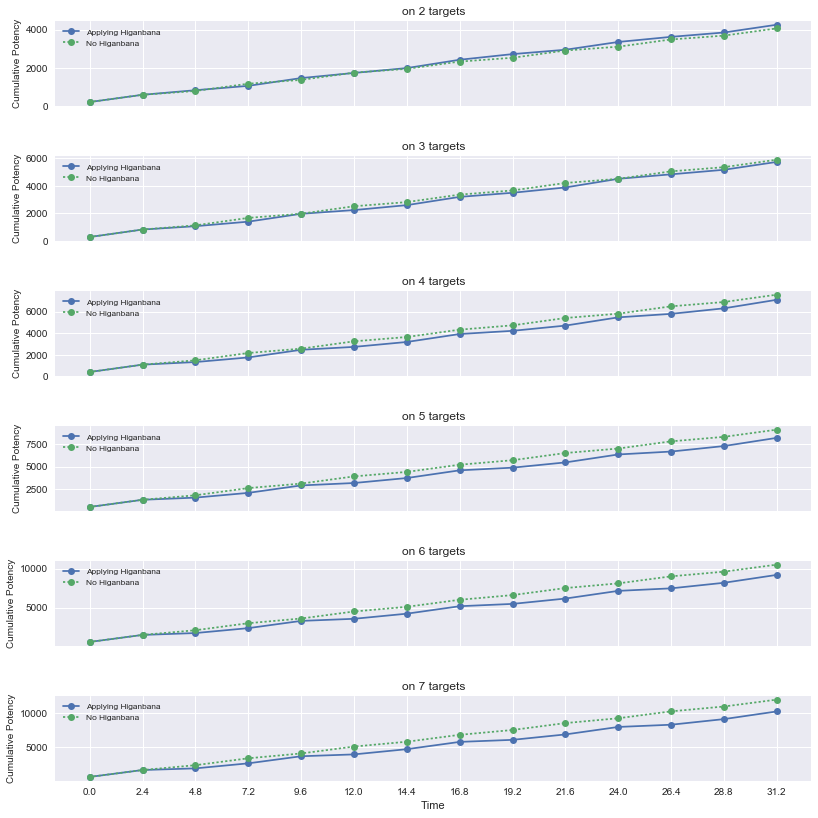

In [29]:
fig, axes = plt.subplots(nrows=len(dfs_higanbana), ncols=1, sharex=True, figsize=(12,12))
fig.tight_layout(pad=2)

for k, _ in enumerate(dfs_higanbana): 
    ax = axes[k]
    
    xlocs = dfs_higanbana[k]['Time']
    ax.plot(xlocs, dfs_higanbana[k]['Total Potency'], '-o', label='Applying Higanbana')
    
    xlocs = dfs_no_higanbana[k]['Time']
    ax.plot(xlocs, dfs_no_higanbana[k]['Total Potency'], ':o', label='No Higanbana')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('Time')
    
    axes[-1].set_xticks(xlocs)
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})
    
    ax.set_title('on %s targets' % n_target_range[k])

fig.tight_layout(pad=3)

Since 3-4 is the typical pull size for leveling dungeons, it is likely optimal to not apply Higanbana to each mob at this level range. However, it is extremely close either way. One advantage for applying Higanbana, however, would be TP relief from executing the AoE weaponskills. Should we buff with Jinpu and Shifu before executing this rotation?

In [30]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Hakaze'), ('Jinpu'),
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'), 
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu')]

In [31]:
df4_buff, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df4_buff)

average potency per GCD = 416.0
average potency per second = 191.264367816


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Hakaze,,150.0,False,True,False,0,0,580.0
3,6.72,Jinpu,,280.0,False,True,False,0,0,860.0
4,8.88,Fuga,,345.0,True,True,False,0,0,1205.0
5,11.04,Mangetsu,,621.0,True,True,False,0,0,1826.0
6,13.20,Fuga,,345.0,True,True,False,0,10,2171.0
7,15.36,Mangetsu,,621.0,True,True,False,0,10,2792.0
8,17.52,Fuga,,345.0,True,True,False,0,20,3137.0
9,19.68,Mangetsu,,621.0,True,True,False,0,20,3758.0


In [32]:
sam = Samurai()

n_targets = 3

actions = [('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu'),
           ('Fuga'), ('Mangetsu'), ('Fuga'), ('Mangetsu')]

In [33]:
df4_no_buff, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df4_no_buff)

average potency per GCD = 420.0
average potency per second = 175.0


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,300.0,False,False,False,0,0,300.0
1,2.4,Mangetsu,,540.0,False,False,False,0,0,840.0
2,4.8,Fuga,,300.0,False,False,False,0,10,1140.0
3,7.2,Mangetsu,,540.0,False,False,False,0,10,1680.0
4,9.6,Fuga,,300.0,False,False,False,0,20,1980.0
5,12.0,Mangetsu,,540.0,False,False,False,0,20,2520.0
6,14.4,Fuga,,300.0,False,False,False,0,30,2820.0
7,16.8,Mangetsu,,540.0,False,False,False,0,30,3360.0
8,19.2,Fuga,,300.0,False,False,False,0,40,3660.0
9,21.6,Mangetsu,,540.0,False,False,False,0,40,4200.0


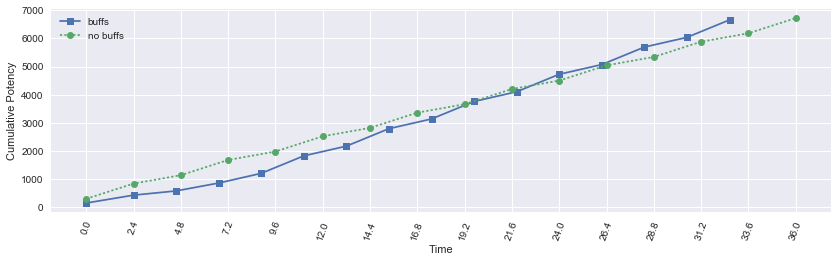

In [34]:
compare_potencies([df4_buff, df4_no_buff], ['buffs', 'no buffs'])

If the pull is long enough, you should buff first. Ideally, you would shift to a single target rotation as mobs die, possibly letting you refresh buffs that carry over to the next pull. 

### Priority: Shifu > Jinpu
### Filler: Gekko combo > Higanbana
### AoE: Mangetsu combo + Higanbana, depending on group size and encounter duration

## lvl 40-49

Level 40 introduces the Kasha combo finisher (combo from Shifu). Equal in potency to the Gekko finisher, this weaponskill opens the Ka Sen. This leads to a maximum of two Sen open and also unlocks the use of the Iaijutsu Tenka Goken. This powerful, AoE weaponskill scales its potency depending on the number of targets from 180 potency up to a maximum of 360 potency for the first target hit. In AoE situations, this is likely Iaijutsu of choice due to its instantaneous damage. Unfortunately, you do not get the AoE weaponskill to open Ka until level 45. For single target, do we still want to try our shiny new Iaijutsu?

In [35]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Tenka Goken'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Tenka Goken')]

In [36]:
df5_tenka, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df5_tenka)

average potency per GCD = 336.302222222
average potency per second = 154.740286299


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.00,False,False,False,0,0,150.00
1,2.40,Shifu,,280.00,False,False,False,0,0,430.00
2,4.56,Kasha,,400.00,False,True,False,0,0,830.00
3,6.72,Higanbana,,240.00,False,True,False,0,10,1070.00
4,8.88,Hakaze,,175.20,False,True,False,1,10,1245.20
5,11.04,Jinpu,,308.98,False,True,False,1,10,1554.18
6,13.20,Gekko,,488.98,True,True,False,1,10,2043.16
7,15.36,Hakaze,,201.48,True,True,False,1,20,2244.64
8,17.52,Shifu,,350.98,True,True,False,1,20,2595.62
9,19.68,Kasha,,488.98,True,True,False,1,20,3084.60


In [37]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu')]

In [38]:
df5_no_tenka, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df5_no_tenka)

average potency per GCD = 313.161666667
average potency per second = 144.092791411


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Higanbana,,240.000,False,True,False,0,10,1070.000
4,8.88,Hakaze,,175.200,False,True,False,1,10,1245.200
5,11.04,Jinpu,,308.980,False,True,False,1,10,1554.180
6,13.20,Gekko,,488.980,True,True,False,1,10,2043.160
7,15.36,Higanbana,,304.980,True,True,False,1,20,2348.140
8,17.52,Hakaze,,205.827,True,True,False,1,20,2553.967
9,19.68,Shifu,,355.327,True,True,False,1,20,2909.294


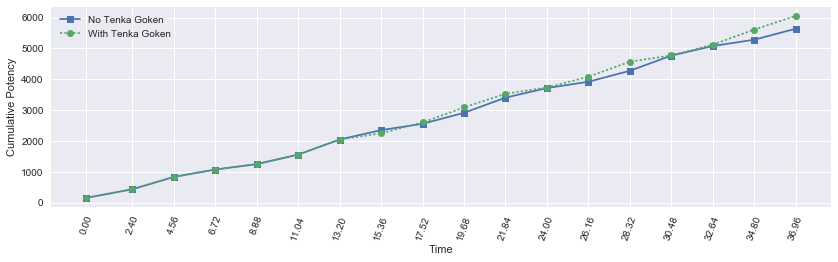

In [39]:
compare_potencies([df5_no_tenka, df5_tenka], ['No Tenka Goken', 'With Tenka Goken'])

It's surprisingly close! I would favor using Tenka Goken since it's fresh though.

With the addition of a second third-level combo finisher plus Tenka Goken, do we want to move away from the AoE weaponskill rotation in favor of a single target one for the standard three mob pull?

In [40]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Tenka Goken')]

In [41]:
df6_higanbana, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_higanbana)

average potency per GCD = 387.405933333
average potency per second = 178.035814951


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Higanbana,,240.000,False,True,False,0,10,1070.000
4,8.88,Hakaze,,175.200,False,True,False,1,10,1245.200
5,11.04,Jinpu,,308.980,False,True,False,1,10,1554.180
6,13.20,Gekko,,488.980,True,True,False,1,10,2043.160
7,15.36,Higanbana,,304.980,True,True,False,1,20,2348.140
8,17.52,Hakaze,,234.807,True,True,False,2,20,2582.947
9,19.68,Shifu,,384.307,True,True,False,2,20,2967.254


In [42]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Tenka Goken'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Tenka Goken'), ('Hakaze')]

In [43]:
df6_tenka_only, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_tenka_only)

average potency per GCD = 402.473333333
average potency per second = 184.960171569


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Kasha,,400.0,False,True,False,0,0,830.0
3,6.72,Hakaze,,150.0,False,True,False,0,10,980.0
4,8.88,Jinpu,,280.0,False,True,False,0,10,1260.0
5,11.04,Gekko,,460.0,True,True,False,0,10,1720.0
6,13.20,Tenka Goken,,1117.8,True,True,False,0,20,2837.8
7,15.36,Hakaze,,172.5,True,True,False,0,20,3010.3
8,17.52,Shifu,,322.0,True,True,False,0,20,3332.3
9,19.68,Kasha,,460.0,True,True,False,0,20,3792.3


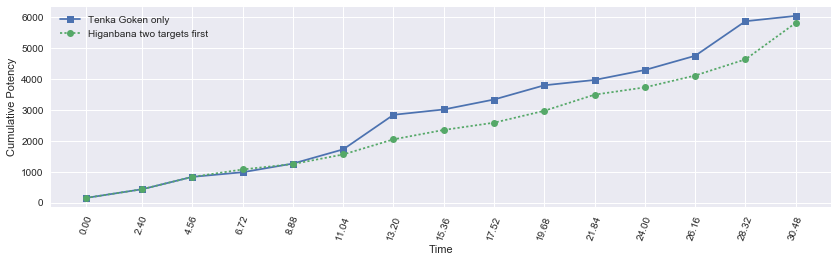

In [44]:
compare_potencies([df6_tenka_only, df6_higanbana], ['Tenka Goken only', 'Higanbana two targets first'])

Although close, both of these rotation potencies are inferior compared to the previous AoE rotations, even they were without Tenka Goken. However, we can open Getsu using the Mangetsu combo and open Ka using the Kasha combo. Maybe that works better?

In [45]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Fuga'), 
           ('Mangetsu'), ('Tenka Goken'), ('Fuga'), ('Mangetsu'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Tenka Goken')]

In [46]:
df6_aoe_higanbana2, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_aoe_higanbana2)

average potency per GCD = 458.21485
average potency per second = 210.964479742


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Higanbana,,240.000,False,True,False,0,10,1070.000
4,8.88,Hakaze,,175.200,False,True,False,1,10,1245.200
5,11.04,Jinpu,,308.980,False,True,False,1,10,1554.180
6,13.20,Gekko,,488.980,True,True,False,1,10,2043.160
7,15.36,Higanbana,,304.980,True,True,False,1,20,2348.140
8,17.52,Hakaze,,234.807,True,True,False,2,20,2582.947
9,19.68,Shifu,,384.307,True,True,False,2,20,2967.254


In [47]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Tenka Goken'), ('Hakaze'), 
           ('Shifu'), ('Kasha'), ('Fuga'), ('Mangetsu'), 
           ('Tenka Goken'), ('Hakaze'), ('Shifu'), ('Kasha'), 
           ('Fuga'), ('Mangetsu'), ('Tenka Goken'), ('Hakaze')]

In [48]:
df6_aoe_tenka_only, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df6_aoe_tenka_only)

average potency per GCD = 454.345
average potency per second = 209.182780847


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Kasha,,400.0,False,True,False,0,0,830.0
3,6.72,Hakaze,,150.0,False,True,False,0,10,980.0
4,8.88,Jinpu,,280.0,False,True,False,0,10,1260.0
5,11.04,Gekko,,460.0,True,True,False,0,10,1720.0
6,13.20,Tenka Goken,,1117.8,True,True,False,0,20,2837.8
7,15.36,Hakaze,,172.5,True,True,False,0,20,3010.3
8,17.52,Shifu,,322.0,True,True,False,0,20,3332.3
9,19.68,Kasha,,460.0,True,True,False,0,20,3792.3


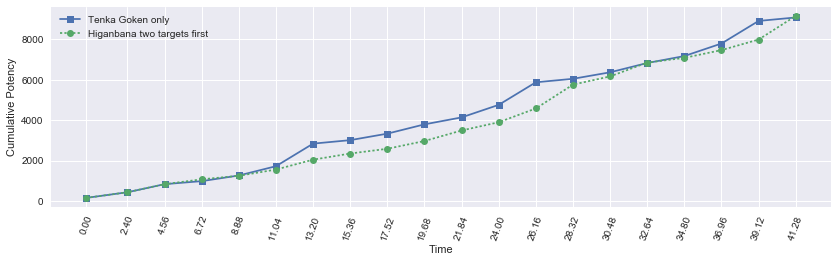

In [49]:
compare_potencies([df6_aoe_tenka_only, df6_aoe_higanbana2], ['Tenka Goken only', 'Higanbana two targets first'])

They're virtually equal, but applying Higanbana twice takes more time to pay off. Using Tenka Goken only is probably better in most cases. Although the inclusion of the AoE weaponskills will scale better with larger pulls, TP sustainability is a concern. As the number of targets dwindles down to 3, it may be better to favor rotations with single target weaponskills.

Thankfully, level 45 introduces the Oka AoE combo (combo from Fuga). This finisher is equal in potency to the Mangetsu finisher, but similarly to Kasha for single target, opens the Ka Sen instead. This opens the AoE rotation of alternating combos to open Ka and Getsu in order to use Tenka Goken. While this is definitely TP unfriendly, it should scale very well with mob size.

In [50]:
dfs_aoe2 = []
pps_aoe2 = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai()
    
    actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
               ('Jinpu'), ('Gekko'), ('Tenka Goken'), ('Fuga'),
               ('Oka'), ('Fuga'), ('Mangetsu'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka'), 
               ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe2.append(df_temp)
    pps_aoe2.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

number of targets = 2
average potency per GCD = 396.929411765
average potency per second = 182.57034632


number of targets = 3
average potency per GCD = 525.729411765
average potency per second = 241.812770563


number of targets = 4
average potency per GCD = 641.811764706
average potency per second = 295.205627706


number of targets = 5
average potency per GCD = 745.176470588
average potency per second = 342.748917749


number of targets = 6
average potency per GCD = 835.823529412
average potency per second = 384.442640693


number of targets = 7
average potency per GCD = 926.470588235
average potency per second = 426.136363636




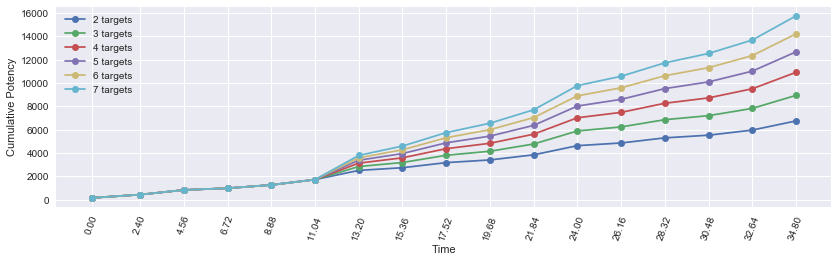

In [51]:
compare_n_potencies(dfs_aoe2, labels)

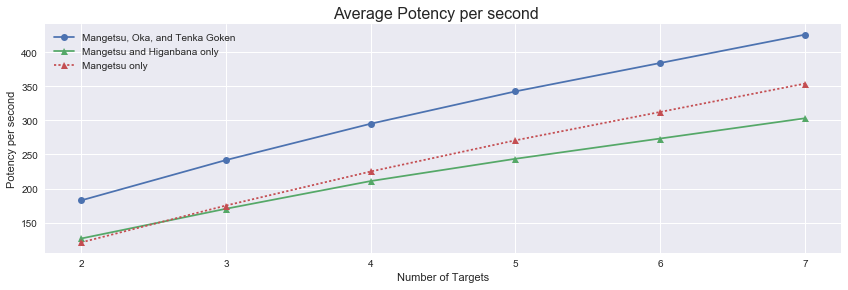

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, pps_aoe2, '-o', label='Mangetsu, Oka, and Tenka Goken')
axes.plot(n_target_range, pps_higanbana, '-^', label='Mangetsu and Higanbana only')
axes.plot(n_target_range, pps_no_higanbana, ':^', label='Mangetsu only')
axes.set_ylabel('Potency per second')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Average Potency per second')

At 3 targets, the potency of a full duration Higanbana is comparable to Tenka Goken, so applying Higanbana to some targets has merit (especially due to its 1 Sen cost). However, the AoE-centric rotation scales exceptionally well as pull size passes 3. The ability to open up Getsu and Ka with only four GCDs allowing for more frequent Tenka Goken casts facilitates that.

For a pull size of three:

In [53]:
sam = Samurai()

n_targets = 3
    
actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Fuga'), ('Oka'), ('Fuga'), ('Mangetsu'), 
           ('Tenka Goken'), ('Fuga'), ('Mangetsu'), ('Fuga'), 
           ('Oka'), ('Tenka Goken')]

In [54]:
df7_3, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
display(df7_3)

average potency per GCD = 503.933888889
average potency per second = 231.871421268


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Higanbana,,240.000,False,True,False,0,10,1070.000
4,8.88,Hakaze,,175.200,False,True,False,1,10,1245.200
5,11.04,Jinpu,,308.980,False,True,False,1,10,1554.180
6,13.20,Gekko,,488.980,True,True,False,1,10,2043.160
7,15.36,Higanbana,,304.980,True,True,False,1,20,2348.140
8,17.52,Fuga,,407.307,True,True,False,2,20,2755.447
9,19.68,Oka,,683.307,True,True,False,2,20,3438.754


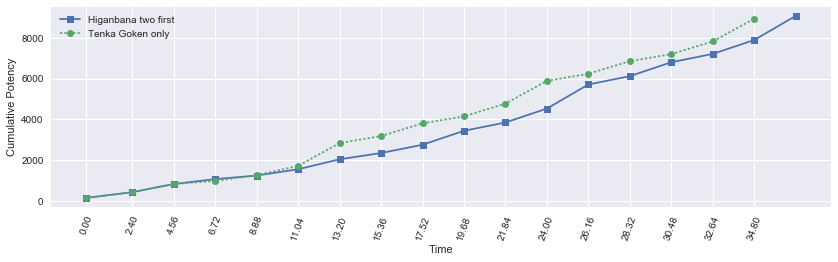

In [55]:
compare_potencies([df7_3, dfs_aoe2[1]], labels=['Higanbana two first', 'Tenka Goken only'])

Once again, Higanbana takes some time to pay off. For pulls reaching the 60 second mark, it may be optimal, especially if we consider that targets start to die, reducing the advantage of Tenka Goken only.

### Priority: Shifu > Jinpu and Higanbana > Tenka Goken

### Filler: Alternate Kasha and Gekko combos to maintain buffs and enable Tenka Goken

### AoE: Buff first Shifu > Jinpu. Mangetsu combo, Oka combo if available, otherwise Kasha combo. For packs of 3, apply Higanbana to 1-2 sturdy targets before building for Tenka Goken if pulls approach 60 seconds in duration. For larger packs, use Tenka Goken only. Shift to single target weaponskills if TP is scarce but prioritize Iaijutsu as described.

Up to this point, Samurai has no abilities or offensive cooldowns that are used in its regular rotation, save for Ageha. The main themes are always keeping buffs up and making use of Iaijutsu as regularly as you can. Samurai has strong AoE although it is expensive to use. From level 50 going forward, Samurai picks up all of its abilities and at level 52, the Kenki gauge and Hissatsu abilities start to be introduced. Once you master the weaponskill rotation that is completed at level 50, you will need to start learning to manage Kenki and use the Kenki spenders efficiently to become a good samurai.